# LAB 4. Probability distributions 

This lab illustrates the ways of analyzing probability distributions in Python, illustrated on examples of:
* people's hights, 
* weather data (outside temperature readings) and city sizes
* city sizes

If you may use a refresher on the basics of probabilities and statistics, including the concept of a random variable, probability distribution, mean and standard deviation you may find a stats bootcamp at: https://github.com/SSobol/ProbabilityStatsBootcamp/blob/master/Stats_Bootcamp_2018.ipynb

In [1]:
#include packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
#include the distributions
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto

## Example 1. People's hight distribution

Source: a sample of 10.000 people heigh-weight info from https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

The specific source and geography not disclosed, so we don't rely on this data being fully representative. So just using for illustration purposes. Although one can notice that the averages fit those reported for US. 

In [7]:
#upload the data
height = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weight-height.csv')

In [9]:
height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
height.describe() #10.000 records

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [14]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


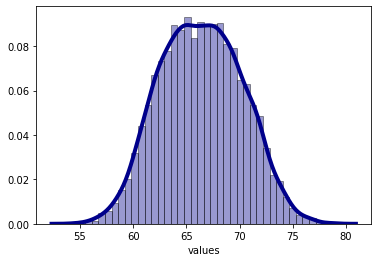

In [17]:
# output the empirical distribution for people's heights - histogram and interpolated curve
distribution_analysis(height.Height, bins=40, vis_means = False)

We can see the distribution somewhat similar to bell curve (normal), but having a wider (double) peak

Mean = 66.37
Standard deviation = 3.85
1 percentile = 58.13
5 percentile = 60.25
25 percentile = 63.51
50 percentile = 66.32
75 percentile = 69.17
95 percentile = 72.62
99 percentile = 74.79


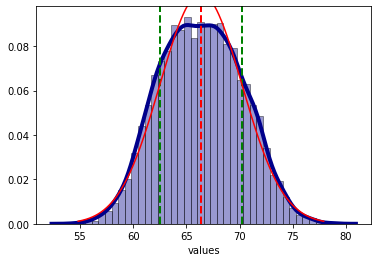

In [18]:
#indeed if we now fit the normal distribution the fit is not going to be perfect
distribution_analysis(height.Height, fit_distribution='normal', bins=40);

This is because the men and women heigh distribution are different and here are mixed together

In fact we have two modes in the distribution. Let's consider them separately

In [20]:
men_height = height[height.Gender=='Male'] #take only men
women_height = height[height.Gender=='Female'] #take only men
print (len(men_height), len(women_height)) #equal sizes of men/women samples

5000 5000


Mean = 69.03
Standard deviation = 2.86
1 percentile = 62.06
5 percentile = 64.33
25 percentile = 67.17
50 percentile = 69.03
75 percentile = 70.99
95 percentile = 73.70
99 percentile = 75.69


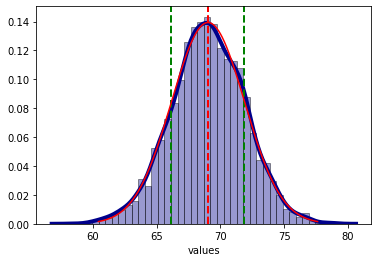

In [21]:
#if we now fit the normal distribution to men heights, it fits pretty well
distribution_analysis(men_height.Height, fit_distribution='normal',bins=40);

The average height is 69", while those taller than 75.7" are already among the 1% outliers 

Mean = 63.71
Standard deviation = 2.70
1 percentile = 57.31
5 percentile = 59.27
25 percentile = 61.89
50 percentile = 63.73
75 percentile = 65.56
95 percentile = 68.14
99 percentile = 69.89


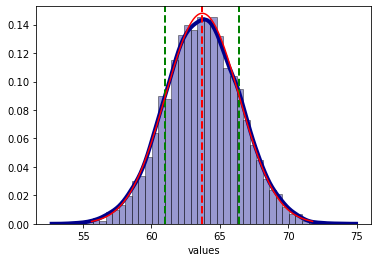

In [24]:
#same for women; just the parameters are different:
#the mean is 63.7" and the 1% outliers start around the same level as the men averages
distribution_analysis(women_height.Height, fit_distribution='normal',bins=40);

### Extrapolating insights with the theoretic distributions
Now illustrate the way fitting the theoretic distribution analysis can help generalize the insights beyond the considered sample. Take a much smaller sample of 100 random men heights - imagine this is all the data we've got

In [25]:
men_sample = men_height.sample(n=100, random_state=11)

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


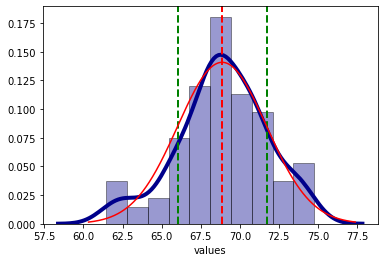

In [27]:
#the empiric distribution looks much more noisy, however the fitted normal distribution has similar parameters compared to the original one
pars = distribution_analysis(men_sample.Height, fit_distribution='normal',bins=10)

Use the fitted distribution to assess the chances for observing extreme hight values. Imagine we're designing a door and want to know the percentage of people if could comfortably accomodate.

In [28]:
#the function reporting pecentage of extreme values above a given `threshold` according to the empiric `data`
#as well as the theoretic distribution `dist` given its parameters `pars`
def extreme_percentage(threshold, data, dist, pars):
    if data is None:
        empiric = None
    else:
        empiric = 100.0 * sum(data >= threshold)/len(data) #compute empiric propobability
    if dist is None:
        theoretic = None
    else:
        theoretic = 100.0 * (1 - dist.cdf(threshold, *pars)) #asses theoretic probability using cumulative distribution function
    print('Percentage higher than {}: theory = {}, empiric = {}'.format(threshold, theoretic, empiric))

In [35]:
#percetage of people at least 6' tall
extreme_percentage(threshold = 72, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 72: theory = 13.481970712238622, empiric = 12.0


We can see the theoretic and empuric estimates are similar, although of course not exactly the same

In [36]:
#percetage of people at least 6.5' tall
extreme_percentage(threshold = 78, data = men_sample.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.0


The theoretic estimate gives a somewhat low chance of 0.06%, while the sample of 100 people does not have heights above 6.5' at all, and this way fails to provide any reliable conclusion other than it should not be much higher than 1%. How appropriate is the theoretic estimate?

In [ ]:
#compare it against the empirical estimate from a larger sample 

In [32]:
extreme_percentage(threshold = 78, data = men_height.Height, dist = norm, pars = pars)

Percentage higher than 78: theory = 0.06394015857694724, empiric = 0.1


So the theoretic distribution provided an estimate pretty close to the one observed from a larger sample without seeing this sample! So it helped drawing a meaningful inferece from a small sample which by itself could not provide the direct empiric estimate. This is what theoretic exprapolation is about and we see it works. Based on it, if we make the door 6.5' hight it will accomodate 99.94% of men entering and even more women as they are less tall on average.

In [37]:
#and it can work much further, where even the larger complete sample fails to provide any estimates
extreme_percentage(threshold = 84, data = men_height.Height, dist = norm, pars = pars)
#the theoretic chance of meeting a man at least 7' tall is 1 out of 20M. No surpise we don't see those in the sample of 5000.

Percentage higher than 84: theory = 4.7119495527603306e-06, empiric = 0.0


But not any theoretic inference can be reliable. E.g. if we fit a different kind of distribution - Pareto, the inferences change dramatically!

Mean = 68.87
Standard deviation = 2.85
1 percentile = 61.92
5 percentile = 63.56
25 percentile = 67.44
50 percentile = 68.70
75 percentile = 70.73
95 percentile = 73.74
99 percentile = 74.10


/Users/stanislav/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


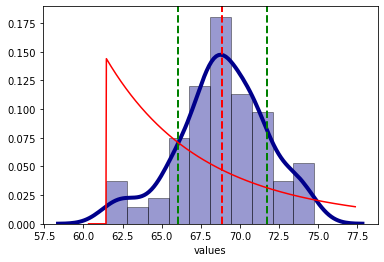

In [39]:
pareto_pars = distribution_analysis(men_sample.Height, fit_distribution='pareto', bins=10)

In [41]:
extreme_percentage(threshold = 84, data = men_height.Height, dist = pareto, pars = pareto_pars)

Percentage higher than 84: theory = 6.291687302412141, empiric = 0.0


It now gives more than a 6% chance (1 out of 16) for meeting an at least 7' tall man! Which is of course completely inconsistent with empirical observation...

But if we look at the plot above, we see that the distribution did not really fit the sample well. So obviously its inferences can't be trusted.

This assessment is visually obvious but it highlights the importance of assessing the quality of the model fit. We are going to provide some more robust quantitative criteria for it later in the class.

## Task 1. Weight analysis
Fit the normal distribution to the a) men and b) women weight observations (use complete sample). Report the parameters and visulize the fit. c) Provide a theoretic and empiric assessment of observing a man and women heavier than 200 lb, 250 lb and 300 lb.

Mean = 187.02
Standard deviation = 19.78
1 percentile = 140.04
5 percentile = 154.80
25 percentile = 173.89
50 percentile = 187.03
75 percentile = 200.36
95 percentile = 218.98
99 percentile = 232.25


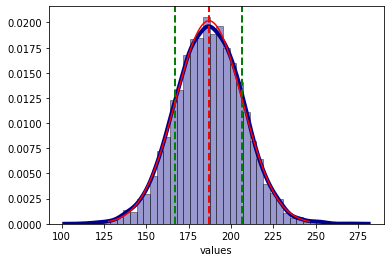

In [50]:
#a)
men_wpar = distribution_analysis(men_height.Weight, fit_distribution='normal', bins=40)

Mean = 135.86
Standard deviation = 19.02
1 percentile = 92.12
5 percentile = 103.96
25 percentile = 122.93
50 percentile = 136.12
75 percentile = 148.81
95 percentile = 166.78
99 percentile = 179.18


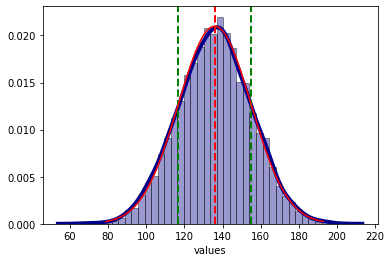

In [51]:
#b)
women_wpar = distribution_analysis(women_height.Weight, fit_distribution='normal', bins=40)

In [53]:
#c)
for w in [200,250,300]:
    print('Men:')
    extreme_percentage(threshold = w, data = men_height.Weight, dist = norm, pars = men_wpar)
    print('Women:')
    extreme_percentage(threshold = w, data = women_height.Weight, dist = norm, pars = women_wpar)

Men:
Percentage higher than 200: theory = 25.584310820070144, empiric = 25.58
Women:
Percentage higher than 200: theory = 0.03729399267543565, empiric = 0.02
Men:
Percentage higher than 250: theory = 0.07259602808863397, empiric = 0.16
Women:
Percentage higher than 250: theory = 9.813261314661759e-08, empiric = 0.0
Men:
Percentage higher than 300: theory = 5.581602957605014e-07, empiric = 0.0
Women:
Percentage higher than 300: theory = 0.0, empiric = 0.0


In [54]:
#as we can see the estimates do not admit the possibility of extreme obesity which we unfortunately observe in real life;
#this might be due to the collected sample not including such cases

## Example 2. Weather data

Consider another example of weather data provided by https://www.noaa.gov

It was collected for several weather stations accross NYC and includes the daily observations of minimal, maximal, average daily temperatures, precipitation and snowfall amounts.

In [75]:
NYCweather = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/weather_daily.csv')

In [76]:
NYCweather.head()

,date,maxtemp,mintemp,avgtemp,precipitation,snowfall,latitude,longitude
0,1/1/11 0:00,51,38,44.5,0,0,40.84,-73.85
1,1/2/11 0:00,52,38,45,0.01,0,40.84,-73.85
2,1/3/11 0:00,38,29,33.5,0,0,40.84,-73.85
3,1/4/11 0:00,42,32,37,0,0,40.84,-73.85
4,1/5/11 0:00,40,32,36,0,0,40.84,-73.85


In [77]:
NYCweather.describe()

,latitude,longitude
count,4774.000000,4774.000000
mean,40.758513,-73.875316
std,0.068739,0.069974
min,40.650000,-73.970000
25%,40.650000,-73.970000
50%,40.770000,-73.900000
75%,40.780000,-73.780000
max,40.840000,-73.780000


As only lat-long seem to be numeric convert other fields of interst to the appropriate type

In [78]:
for col in ['maxtemp','mintemp','avgtemp']:
    NYCweather[col] = pd.to_numeric(NYCweather[col],errors='coerce')

In [79]:
NYCweather.date = pd.to_datetime(NYCweather.date)

In [80]:
NYCweather.dropna(inplace = True) #drop records with nan's

In [81]:
(NYCweather.date.min(),NYCweather.date.max()) #period of observation

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-05-01 00:00:00'))

In [82]:
NYCweather[['latitude','longitude','date']].groupby(['latitude','longitude']).count() #see the observations per station

,,date
latitude,longitude,
40.65,-73.78,1217
40.77,-73.90,1217
40.78,-73.97,1210
40.84,-73.85,824


In [83]:
NYCweather = NYCweather[NYCweather.latitude == 40.77] #take one of the two stations (in Long Island City) with max observation days 

In [84]:
len(NYCweather)

1217

Now look at the distribution of the average daily temperatures

Mean = 55.15
Standard deviation = 17.45
1 percentile = 19.50
5 percentile = 27.90
25 percentile = 41.00
50 percentile = 54.50
75 percentile = 71.00
95 percentile = 82.50
99 percentile = 87.00


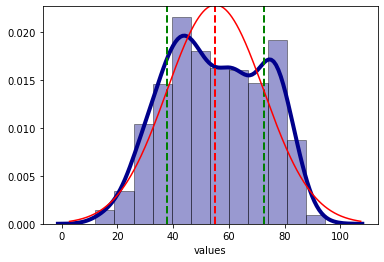

(55.14749383730485, 17.44202216213827)

In [96]:
distribution_analysis(NYCweather.avgtemp, fit_distribution='normal',bins=12)

The distribution generally resembles the bell curve but does not look that consistent. Perhaps this is because we have seasons in NYC and summer temperatures are nothing alike winter temperatures?

Let's filter only summer and take the max temperatures for this period

In [87]:
NYCweather['month'] = pd.DatetimeIndex(NYCweather['date']).month #get the month from the date

In [88]:
NYCsummer=NYCweather[(NYCweather['month']>=6) & (NYCweather['month']<=8)] #filter the summer observations only

Mean = 76.94
Standard deviation = 6.08
1 percentile = 62.00
5 percentile = 66.38
25 percentile = 73.00
50 percentile = 77.00
75 percentile = 81.50
95 percentile = 86.25
99 percentile = 89.62


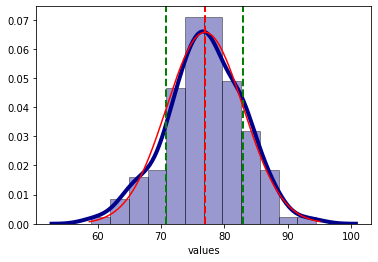

(76.93659420289855, 6.071327362017139)

In [98]:
distribution_analysis(NYCsummer.avgtemp, fit_distribution='normal',bins=12) #avg temp distribution

Mean = 84.16
Standard deviation = 7.13
1 percentile = 67.25
5 percentile = 72.00
25 percentile = 80.00
50 percentile = 84.00
75 percentile = 89.00
95 percentile = 96.25
99 percentile = 100.00


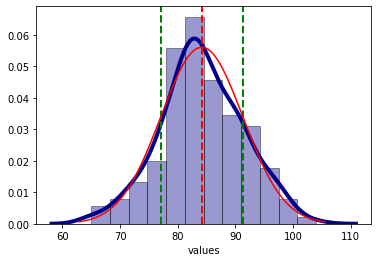

In [99]:
summertemp_pars = distribution_analysis(NYCsummer.maxtemp, fit_distribution='normal',bins=12) #max temp distribution

What is the theoretic and emprical chance of encountering a max temp above 100 degrees? Above 105?

In [101]:
extreme_percentage(threshold = 100, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

Percentage higher than 100: theory = 1.2997506272690917, empiric = 1.4492753623188406


In [103]:
extreme_percentage(threshold = 105, data = NYCsummer.maxtemp, dist = norm, pars = summertemp_pars)

Percentage higher than 105: theory = 0.17002588174360733, empiric = 0.0


## Task 2. Analyze the distribution of winter min temperatures. 
Consider only the months of 12,1,2. Fit the normal distribution. Assess the chance of encountering a min temperature below 20, 10, 0F

Note: you'll need to modify the extreme_percentage function to return low percentages (create a new one extreme_low_percentage) 

Extracredit: can you think of the way of getting those extreme low percentages (theoretic or both - theoretic and empiric) using the old version of the function?

In [104]:
NYCwinter=NYCweather[(NYCweather['month']==12) | (NYCweather['month']<=2)] #take the winter observations only

Mean = 30.63
Standard deviation = 8.88
1 percentile = 9.00
5 percentile = 14.45
25 percentile = 25.00
50 percentile = 32.00
75 percentile = 37.00
95 percentile = 44.00
99 percentile = 49.42


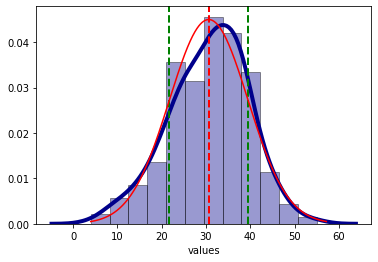

In [105]:
wintertemp_pars = distribution_analysis(NYCwinter.mintemp, fit_distribution='normal',bins=12) #min temp distribution

In [106]:
#modification of the function to report percentages of lower outliers
def extreme_low_percentage(threshold, data, dist, pars):
    if data is None:
        empiric = None
    else:
        empiric = 100.0 * sum(data <= threshold)/len(data) #compute empiric propobability
    if dist is None:
        theoretic = None
    else:
        theoretic = 100.0 * dist.cdf(threshold, *pars) #asses theoretic probability using cumulative distribution function
    print('Percentage higher than {}: theory = {}, empiric = {}'.format(threshold, theoretic, empiric))

In [107]:
for t in [20, 10, 0]:
    extreme_low_percentage(threshold = t, data = NYCwinter.mintemp, dist = norm, pars = wintertemp_pars)

Percentage higher than 20: theory = 11.525555211201777, empiric = 12.727272727272727
Percentage higher than 10: theory = 0.9974297526919376, empiric = 2.4242424242424243
Percentage higher than 0: theory = 0.027455170747844516, empiric = 0.0


In [108]:
## and here is the wayaround with using the old function. Let's reflect the temperatures around 0! 
# We do not have to re-fit the distribution, can just reflect the mean

In [112]:
print ('Note that reported thresholds are reflected around zero')
for t in [20, 10, 0]:
    extreme_percentage(threshold = -t, data = -NYCwinter.mintemp, dist = norm, pars = (-wintertemp_pars[0],wintertemp_pars[1]))

Note that reported thresholds are reflected around zero
Percentage higher than -20: theory = 11.525555211201777, empiric = 12.727272727272727
Percentage higher than -10: theory = 0.9974297526919362, empiric = 2.4242424242424243
Percentage higher than 0: theory = 0.027455170747847646, empiric = 0.0


# Example 3. City sizes

Analyze the distribution of city sizes accross US and the world based on the data from https://simplemaps.com/data/world-cities

In [113]:
UScities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/uscities.csv')

In [114]:
UScities.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220.0,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807.0,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203.0,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545.0,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938.0,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440


In [115]:
UScities.describe() #we have cities with zero population

,county_fips,lat,lng,population,density,ranking,id
count,29488.000000,29488.000000,29488.000000,2.948800e+04,29488.000000,29488.000000,2.948800e+04
mean,29940.044018,38.716075,-92.584179,1.379529e+04,511.632932,2.947368,1.838234e+09
std,15768.565361,5.877632,15.767434,1.860881e+05,779.074081,0.231063,1.929139e+07
min,1001.000000,17.955900,-176.629500,0.000000e+00,0.000000,1.000000,1.630024e+09
25%,17201.000000,35.225400,-98.115500,3.230000e+02,115.000000,3.000000,1.840008e+09
50%,30031.000000,39.478250,-89.914750,1.074000e+03,295.000000,3.000000,1.840016e+09
75%,42041.000000,41.927575,-81.444125,4.323250e+03,601.000000,3.000000,1.840024e+09
max,72153.000000,71.272800,173.123000,1.871322e+07,33191.000000,4.000000,1.840142e+09


In [117]:
UScities = UScities[UScities.population >= 100] #keep only those with at least 100 residents

In [118]:
len(UScities) #there are 27k of US cities in the database

27127

Mean = 14991.52
Standard deviation = 193971.44
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


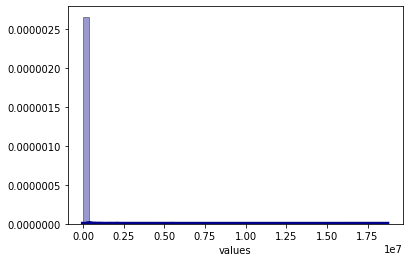

In [122]:
distribution_analysis(UScities.population, vis_means = False) 
#clearly visualizing the distribution on the original scale does not make much sense
#this is because the scale ranges considerable (std so much higher than the mean)

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


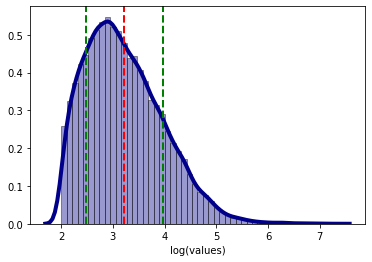

In [123]:
#let's repeat on the log-scale 
distribution_analysis(UScities.population, log_scale=True)

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


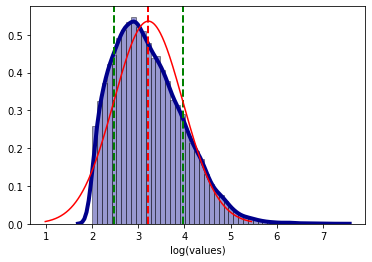

(3.2176434376889214, 0.744223545403654)

In [125]:
#the distribution now makes more sense; but as its not centered around mean, the normal distribution won't fit well
distribution_analysis(UScities.population, log_scale=True, fit_distribution='normal')

Log mean = 3.22(1650.61), mean = 14991.52
Standard deviation = 0.74
1 percentile = 110.00
5 percentile = 151.00
25 percentile = 441.00
50 percentile = 1307.00
75 percentile = 4933.00
95 percentile = 36304.50
99 percentile = 163940.38


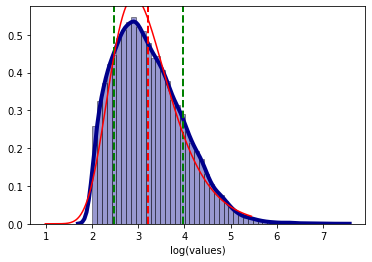

In [126]:
#lets try GEV instead
pars = distribution_analysis(UScities.population, log_scale=True, fit_distribution='gev')

It fits better but maybe not perfectly well

Let's also try a rank plot visualization

In [127]:
#function visualizing the rank plot for the 'top_percentile' of the values 'x' on the `log_scale` by default
def rank_plot(x, log_scale = True, top_percentile = 100):
    v = np.sort(x)[::-1]
    r = np.arange(1.0,len(x)+0.1,1.0) / len(x)
    st = ''
    v = v[r<=top_percentile/100.0]; r = r[r<=top_percentile/100.0]
    if log_scale:
        r = np.log10(r)
        v = np.log10(v)
        st = 'log'
    plt.plot(r,v,'o:')
    plt.xlabel(st+'rank')
    plt.ylabel(st+'value')

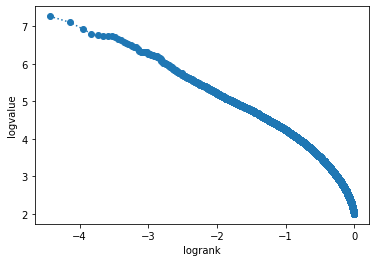

In [128]:
rank_plot(UScities.population) #we can see the log-log rank plot nearly linear in the beginning

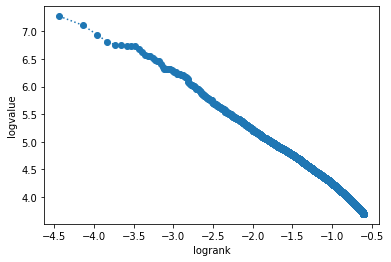

In [134]:
rank_plot(UScities.population, top_percentile = 25) #so now focus on the top 25% of the cities (those are the ones above 5000 residents)

The plot is nearly linear with the slope coefficient pretty close to -1. It corresponds to an almost perfect Zipf law $$Population \sim \frac{1}{rank}$$

In [166]:
#introduce a function reporting cumulative population of the `top_percentile` cities
def pareto_percent(top_percentile, data):
    empiric = 100.0 * sum(data[data >= np.percentile(data, 100.0 - top_percentile)])/sum(data)
    print('Top {} percent observations contribute {} percent of the total'.format(top_percentile, empiric))

In [172]:
pareto_percent(20,UScities.population) #to 20 percent of cities cover even more than 80% - >90% of the total population

Top 20 percent observations contribute 91.86801721653124 percent of the total


In [39]:
pareto_percent(7,UScities.population[UScities.population>=100]) #and it takes only 7% to cover 80% of the population

Top 7 percent observations contribute 80.23835404605484 percent of the total


In [352]:
pareto_percent(1,UScities.population[UScities.population>=100]) #top 1% covers more than 50% of the population

Top 1 percent observations contribute 57.45622503314693 percent of the total


## Task 3. Repeat the analysis for the world cities

Upload the data and keep only the cities above 10000 in population. Output the `describe` statistics.

Fit the GEV distribution on the log scale. Visualize the rank plot for the top 25% of the cities (after filtering). Report the percentage of the total population covered by top 20% and top 5% of the cities

In [151]:
## upload the dataset for major world cities
WorldCities = pd.read_csv('https://raw.githubusercontent.com/CUSP2020PUI/Data/master/worldcities.csv')

In [152]:
WorldCities.describe()

,lat,lng,population,id
count,15493.000000,15493.000000,1.380800e+04,1.549300e+04
mean,29.633315,-29.834189,1.812480e+05,1.623208e+09
std,22.414727,76.340457,7.947989e+05,2.826451e+08
min,-54.933300,-179.590000,0.000000e+00,1.004003e+09
25%,22.305000,-86.324200,9.167500e+03,1.404601e+09
50%,37.756200,-71.916700,2.349650e+04,1.826644e+09
75%,42.444200,25.582100,9.030625e+04,1.840015e+09
max,82.483300,179.383300,3.567600e+07,1.934000e+09


In [153]:
WorldCities = WorldCities[WorldCities.population >= 10000] #keep only those above 10000 residents

In [154]:
WorldCities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [156]:
WorldCities.describe() #intrestingly there are exactly 10.000 of them

,lat,lng,population,id
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,27.771663,-27.418926,2.479068e+05,1.602572e+09
std,22.412946,78.151883,9.252928e+05,2.901103e+08
min,-54.790000,-175.220600,1.000000e+04,1.004003e+09
25%,18.382750,-86.469725,1.972200e+04,1.360141e+09
50%,35.577650,-71.409250,4.590400e+04,1.792726e+09
75%,41.690525,32.549900,1.528985e+05,1.840015e+09
max,70.767000,179.383300,3.567600e+07,1.894964e+09


Log mean = 4.80(62624.52), mean = 247906.80
Standard deviation = 0.62
1 percentile = 10265.00
5 percentile = 11388.90
25 percentile = 19722.00
50 percentile = 45904.00
75 percentile = 152898.50
95 percentile = 1000000.00
99 percentile = 3297030.00


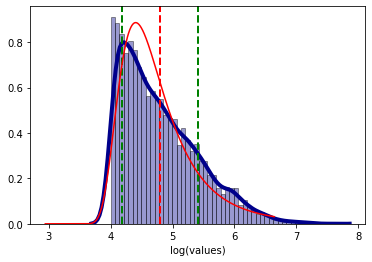

(-0.18079173100694484, 4.473642899488972, 0.4216213303419021)

In [159]:
distribution_analysis(WorldCities.population, log_scale=True, fit_distribution='gev');

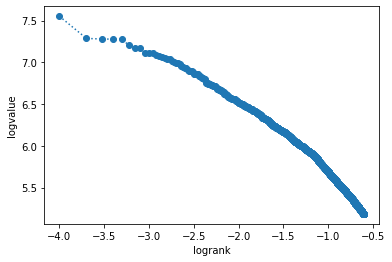

In [164]:
rank_plot(WorldCities.population, log_scale=True, top_percentile=25)

In [167]:
pareto_percent(20,WorldCities.population)

Top 20 percent observations contribute 83.4127145884519 percent of the total


In [171]:
pareto_percent(5,WorldCities.population)

Top 5 percent observations contribute 56.51278382616403 percent of the total


## Task 4. Taxi trip duration analysis

Upload the 'yellowTaxi_cleaned.csv' file saved in the previous lab. Analyze the trip distance the the trip duration distributions. Try fitting normal distribution on the original and the log-scale.

Take only the trips which start and end on Manhattan (feel free to use the taxi zones shapefile https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile for borough information, create a TZ to borhough dictionary, mapt it for filtering). Repeat the distribution analysis for the trip distances.

In [174]:
taxi=pd.read_csv('yellowTaxi_cleaned.csv')

Log mean = 1.01(10.18), mean = 13.01
Standard deviation = 0.31
1 percentile = 1.93
5 percentile = 3.12
25 percentile = 6.28
50 percentile = 10.28
75 percentile = 16.63
95 percentile = 32.32
99 percentile = 49.62


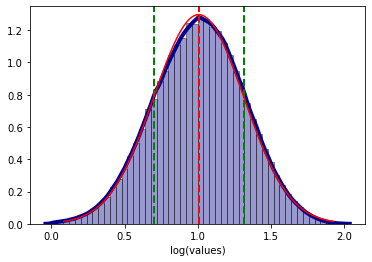

(1.007885182079432, 0.30782795766918913)

In [175]:
distribution_analysis(taxi.trip_duration, log_scale = True, fit_distribution='normal')

Log mean = 0.25(1.77), mean = 2.84
Standard deviation = 0.39
1 percentile = 0.36
5 percentile = 0.50
25 percentile = 0.95
50 percentile = 1.57
75 percentile = 2.85
95 percentile = 10.61
99 percentile = 18.90


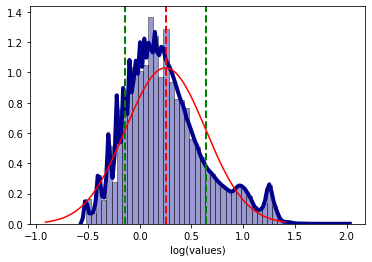

(0.24912013289336216, 0.38701940848034877)

In [176]:
distribution_analysis(taxi.trip_distance, log_scale = True, fit_distribution='normal')

In [181]:
#now filter the trips within Manhattan

In [178]:
import geopandas as gpd
tz = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')

In [180]:
tz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [182]:
borough={r.location_i:r.borough for (_,r) in tz.iterrows()} #create a tz to borough dictionary

In [183]:
taxi_MH = taxi[(taxi.DOLocationID.map(borough)=='Manhattan') & (taxi.PULocationID.map(borough)=='Manhattan')]

Log mean = 0.15(1.43), mean = 1.80
Standard deviation = 0.29
1 percentile = 0.34
5 percentile = 0.50
25 percentile = 0.90
50 percentile = 1.40
75 percentile = 2.21
95 percentile = 4.60
99 percentile = 7.16


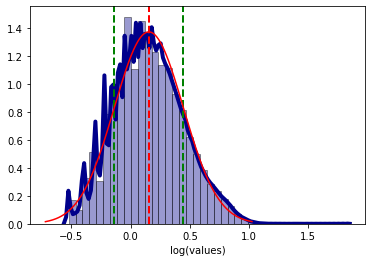

(0.15409881944342033, 0.2909308754850655)

In [185]:
distribution_analysis(taxi_MH.trip_distance, log_scale = True, fit_distribution = 'normal', bins = 40)